## Infosys Stock Price Analysis

In [1]:
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf
from bokeh.io import show, output_notebook
import bokeh

### Loading data for 2015 and 2016

In [2]:
data1 = pd.read_csv('./INFY stock prices.csv')

In [3]:
data2 = pd.read_csv('./INFY stock prices 2016.csv')

In [4]:
INFY_Stock_Prices = data1.append(data2,ignore_index=True)

In [5]:
INFY_Stock_Prices.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,INFY,EQ,01-Jan-2015,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,500691,9.870306e+08,14908,258080,51.54
1,INFY,EQ,02-Jan-2015,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,1694580,3.394669e+09,54166,1249104,73.71
2,INFY,EQ,05-Jan-2015,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,2484256,4.979911e+09,82694,1830962,73.70
3,INFY,EQ,06-Jan-2015,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,2416829,4.724458e+09,108209,1772070,73.32
4,INFY,EQ,07-Jan-2015,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,1812479,3.557162e+09,62463,1317720,72.70


### 1.1 New dataframe for Moving Average or we can do on the same Dataframe as well

In [6]:
INFY_Stock_Prices_MA = pd.DataFrame()

### Function for calculating 52 week moving average

In [7]:
def Calculate_Moving_Average(df,original_df):
    for i in range(4,53,12):
        df['MA'+str(i)] = original_df['Close Price'].rolling(window=i).mean()
    

In [8]:
Calculate_Moving_Average(INFY_Stock_Prices_MA,INFY_Stock_Prices)
##Printing only head
INFY_Stock_Prices_MA.head()

,MA4,MA16,MA28,MA40,MA52
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,1984.4250,NaN,NaN,NaN,NaN
4,1981.7125,NaN,NaN,NaN,NaN


### 1.2 Windowing for 10.
I was not getting idea of how to perform that looback task.

In [9]:
for i in range(2,11):
    INFY_Stock_Prices['Windowing'+str(i-1)] = INFY_Stock_Prices['Close Price'].rolling(i).sum()

In [10]:
INFY_Stock_Prices.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,% Dly Qt to Traded Qty,Windowing1,Windowing2,Windowing3,Windowing4,Windowing5,Windowing6,Windowing7,Windowing8,Windowing9
0,INFY,EQ,01-Jan-2015,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,...,51.54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,INFY,EQ,02-Jan-2015,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,...,73.71,3987.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,INFY,EQ,05-Jan-2015,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,...,73.70,4009.10,5983.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,INFY,EQ,06-Jan-2015,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,...,73.32,3950.10,5963.30,7937.70,NaN,NaN,NaN,NaN,NaN,NaN
4,INFY,EQ,07-Jan-2015,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,...,72.70,3917.75,5913.65,7926.85,9901.25,NaN,NaN,NaN,NaN,NaN


### 1.3.1 Volume Shock 
Here I created three colummns-> <b>Volume_Shock_Increase,Volume_Shock_Positive,Volume_Shock_Negative</b>
I can perform dummy coding for Volume_Shock_Positive and Negative using Label Encoder in Scikit-learn,but I performed in this way.

In [11]:
for i in range(0,(len(INFY_Stock_Prices)-1)):
    Volume_Shocks_Prices_Value = ((INFY_Stock_Prices.loc[(i+1),'Total Traded Quantity'] - INFY_Stock_Prices.loc[i,'Total Traded Quantity'])/(INFY_Stock_Prices.loc[i,'Total Traded Quantity'])*100)
    if abs(Volume_Shocks_Prices_Value)>10:
        INFY_Stock_Prices.loc[i,'Volume_Shock_Increase'] = 0
        if Volume_Shocks_Prices_Value>0:
            INFY_Stock_Prices.loc[i,'Volume_Shock_Positive'] = 0
            INFY_Stock_Prices.loc[i,'Volume_Shock_Negative'] = 1
        else:
            INFY_Stock_Prices.loc[i,'Volume_Shock_Negative'] = 0
            INFY_Stock_Prices.loc[i,'Volume_Shock_Positive'] = 1
            
    else:
        INFY_Stock_Prices.loc[i,'Volume_Shock_Increase'] = 1

In [12]:
INFY_Stock_Prices.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Windowing3,Windowing4,Windowing5,Windowing6,Windowing7,Windowing8,Windowing9,Volume_Shock_Increase,Volume_Shock_Positive,Volume_Shock_Negative
0,INFY,EQ,01-Jan-2015,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
1,INFY,EQ,02-Jan-2015,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0
2,INFY,EQ,05-Jan-2015,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN
3,INFY,EQ,06-Jan-2015,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,...,7937.70,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,0.0
4,INFY,EQ,07-Jan-2015,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,...,7926.85,9901.25,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0


### 1.3.2 Price Shock 
Here I created three colummns-> <b>Price_Shock_Increase,Price_Shock_Positive,Price_Shock_Negative</b>
I can perform dummy coding for Price_Shock_Positive and Negative using Label Encoder in Scikit-learn,but I performed in this way. 

In [13]:
for i in range(0,(len(INFY_Stock_Prices)-1)):
    Price_Shock_Value = ((INFY_Stock_Prices.loc[(i+1),'Close Price'] - INFY_Stock_Prices.loc[i,'Close Price'])/(INFY_Stock_Prices.loc[i,'Close Price'])*100)
    if abs(Price_Shock_Value)>2:
        INFY_Stock_Prices.loc[i,'Price_Shock_Increase'] = 0
        if Price_Shock_Value>0:
            INFY_Stock_Prices.loc[i,'Price_Shock_Positive'] = 0
            INFY_Stock_Prices.loc[i,'Price_Shock_Negative'] = 1
        else:
            INFY_Stock_Prices.loc[i,'Price_Shock_Negative'] = 0
            INFY_Stock_Prices.loc[i,'Price_Shock_Positive'] = 1
            
    else:
        INFY_Stock_Prices.loc[i,'Price_Shock_Increase'] = 1

In [14]:
INFY_Stock_Prices.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Windowing6,Windowing7,Windowing8,Windowing9,Volume_Shock_Increase,Volume_Shock_Positive,Volume_Shock_Negative,Price_Shock_Increase,Price_Shock_Negative,Price_Shock_Positive
0,INFY,EQ,01-Jan-2015,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,NaN,NaN
1,INFY,EQ,02-Jan-2015,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,NaN,NaN
2,INFY,EQ,05-Jan-2015,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0,1.0
3,INFY,EQ,06-Jan-2015,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,...,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,NaN,NaN
4,INFY,EQ,07-Jan-2015,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,...,NaN,NaN,NaN,NaN,0.0,0.0,1.0,1.0,NaN,NaN


### 1.3.4 Price_Shock Without Volume Shock

In [15]:
for i in range(0,len(INFY_Stock_Prices)):
    if (INFY_Stock_Prices.loc[i,'Price_Shock_Increase']==0 and INFY_Stock_Prices.loc[i,'Volume_Shock_Increase']==1):
        INFY_Stock_Prices.loc[i,'Price_Shock_Without_Volume_Shock'] = 0
    else:
        INFY_Stock_Prices.loc[i,'Price_Shock_Without_Volume_Shock'] = 1

In [16]:
INFY_Stock_Prices.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Windowing7,Windowing8,Windowing9,Volume_Shock_Increase,Volume_Shock_Positive,Volume_Shock_Negative,Price_Shock_Increase,Price_Shock_Negative,Price_Shock_Positive,Price_Shock_Without_Volume_Shock
0,INFY,EQ,01-Jan-2015,1972.55,1968.95,1982.00,1956.9,1971.00,1974.40,1971.34,...,NaN,NaN,NaN,0.0,0.0,1.0,1.0,NaN,NaN,1.0
1,INFY,EQ,02-Jan-2015,1974.40,1972.00,2019.05,1972.0,2017.95,2013.20,2003.25,...,NaN,NaN,NaN,0.0,0.0,1.0,1.0,NaN,NaN,1.0
2,INFY,EQ,05-Jan-2015,2013.20,2009.90,2030.00,1977.5,1996.00,1995.90,2004.59,...,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0,1.0,0.0
3,INFY,EQ,06-Jan-2015,1995.90,1980.00,1985.00,1934.1,1965.10,1954.20,1954.82,...,NaN,NaN,NaN,0.0,1.0,0.0,1.0,NaN,NaN,1.0
4,INFY,EQ,07-Jan-2015,1954.20,1965.00,1974.75,1950.0,1966.05,1963.55,1962.59,...,NaN,NaN,NaN,0.0,0.0,1.0,1.0,NaN,NaN,1.0


### 2 Time Series Plot 

In [17]:
output_notebook()

Loading BokehJS ...

### 2.1 Simple Time Series 

In [18]:
from bokeh.plotting import figure, show, output_file

# prepare some data
x = INFY_Stock_Prices.index
y = INFY_Stock_Prices['Close Price']


# output to static HTML file
output_file("Time_Series_Plots.html")

# create a new plot with a title and axis labels
p = figure(title="simple time series", x_axis_label='x', y_axis_label='y')

# add a line renderer with legend and line thickness
p.line(x, y, legend="Close Price", line_width=2)

# show the results
show(p)

### Two Volume Shocks
1. Dot plots
2. Bar plots

### Volume Shock Dot Plot 

In [19]:
from bokeh.layouts import row
from bokeh.plotting import figure, show, output_file

output_file("Time_Series_Plots.html")

factors = INFY_Stock_Prices.loc[0:495,'Volume_Shock_Increase'].unique()

x =  [(len(INFY_Stock_Prices.loc[INFY_Stock_Prices['Volume_Shock_Increase'] == 0])) , (len(INFY_Stock_Prices.loc[INFY_Stock_Prices['Volume_Shock_Increase'] == 1]))]

dot = figure(title="Volume Shock Dot Plot", tools="", toolbar_location=None,
            y_range=factors, x_range=[0,len(INFY_Stock_Prices)])

dot.segment(-1, factors, x, factors, line_width=2, line_color="green", )
dot.circle(x, factors, size=15, fill_color="orange", line_color="green", line_width=3, )
show(dot)

### Volume Shock Bar Plot

In [20]:
from bokeh.io import show, output_file
from bokeh.plotting import figure

output_file("Time_Series_Plots.html")
top = [(len(INFY_Stock_Prices.loc[INFY_Stock_Prices['Volume_Shock_Increase'] == 0])) , (len(INFY_Stock_Prices.loc[INFY_Stock_Prices['Volume_Shock_Increase'] == 1]))]

fruits = INFY_Stock_Prices.loc[0:495,'Volume_Shock_Increase'].unique()

p = figure(x_range=fruits, plot_height=250, title="Volume Shock Counts",
           toolbar_location=None, tools="")

p.vbar(x=fruits, top=top, width=0.9,color='Red')

p.xgrid.grid_line_color = None
p.y_range.start = 0

show(p)

### Price Shock without Volume
Try to show some circle 
0: Yes
1: No

In [21]:
output_file("Time_Series_Plots.html")
p = figure()
p.circle(x= INFY_Stock_Prices.index, y=INFY_Stock_Prices.Price_Shock_Without_Volume_Shock,size=2,color='red')
show(p)

### Pacf Graph with lags

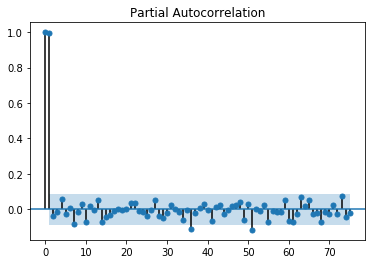

In [22]:
plot_pacf(INFY_Stock_Prices['Close Price'], lags=75)
plt.show(plot_pacf)